<a href="https://colab.research.google.com/github/Sohail1173/BankNote_Authentication/blob/main/BankNote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/BankNote_Authentication.csv")

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
x, y = df.values[:, :-1], df.values[:, -1]

x = x.astype('float32')
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
#print the shape of the train and test data values
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


In [119]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential

In [120]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [121]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
     


In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                50        
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [123]:
history=model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
87/87 [==============================] - 2s 7ms/step - loss: 0.9251 - accuracy: 0.6447 - val_loss: 0.6547 - val_accuracy: 0.7083
Epoch 2/50
87/87 [==============================] - 0s 6ms/step - loss: 0.7588 - accuracy: 0.6898 - val_loss: 0.5137 - val_accuracy: 0.7500
Epoch 3/50
87/87 [==============================] - 1s 6ms/step - loss: 0.6095 - accuracy: 0.7338 - val_loss: 0.4007 - val_accuracy: 0.7812
Epoch 4/50
87/87 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.7882 - val_loss: 0.3189 - val_accuracy: 0.8333
Epoch 5/50
87/87 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.8032 - val_loss: 0.2562 - val_accuracy: 0.8958
Epoch 6/50
87/87 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8530 - val_loss: 0.2089 - val_accuracy: 0.9583
Epoch 7/50
87/87 [==============================] - 0s 4ms/step - loss: 0.2833 - accuracy: 0.8912 - val_loss: 0.1771 - val_accuracy: 0.9688
Epoch 8/50
87/87 [==

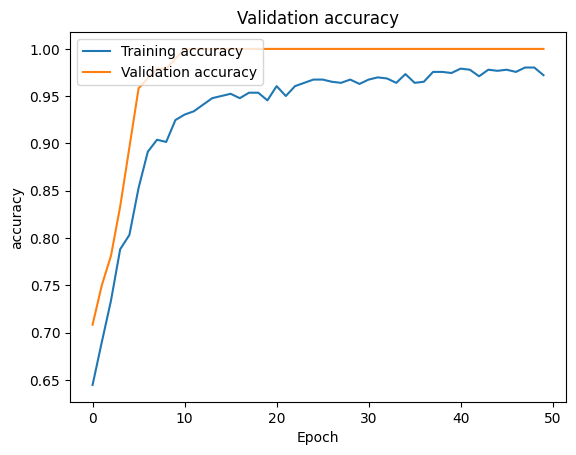

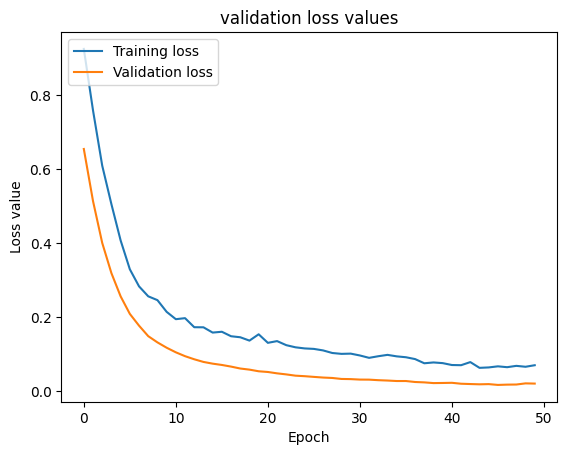

In [124]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [128]:
loss = model.evaluate(x_test, y_test)
print(loss)

13/13 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9903
[0.02004372328519821, 0.9902912378311157]


In [129]:
y_pred=model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [132]:
classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       229\n           1       0.99      0.99      0.99       183\n\n    accuracy                           0.99       412\n   macro avg       0.99      0.99      0.99       412\nweighted avg       0.99      0.99      0.99       412\n'